In [28]:
import pandas as pd
import pyxlsb as pxl
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')

In [30]:
df.info()

# é possível perceber que há dados incompletos de bmi, como são poucos vou removê-los

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [31]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [32]:
# o id do paciente não é importante para a análise, podemos descartá-lo
df = df.drop('id', axis=1)


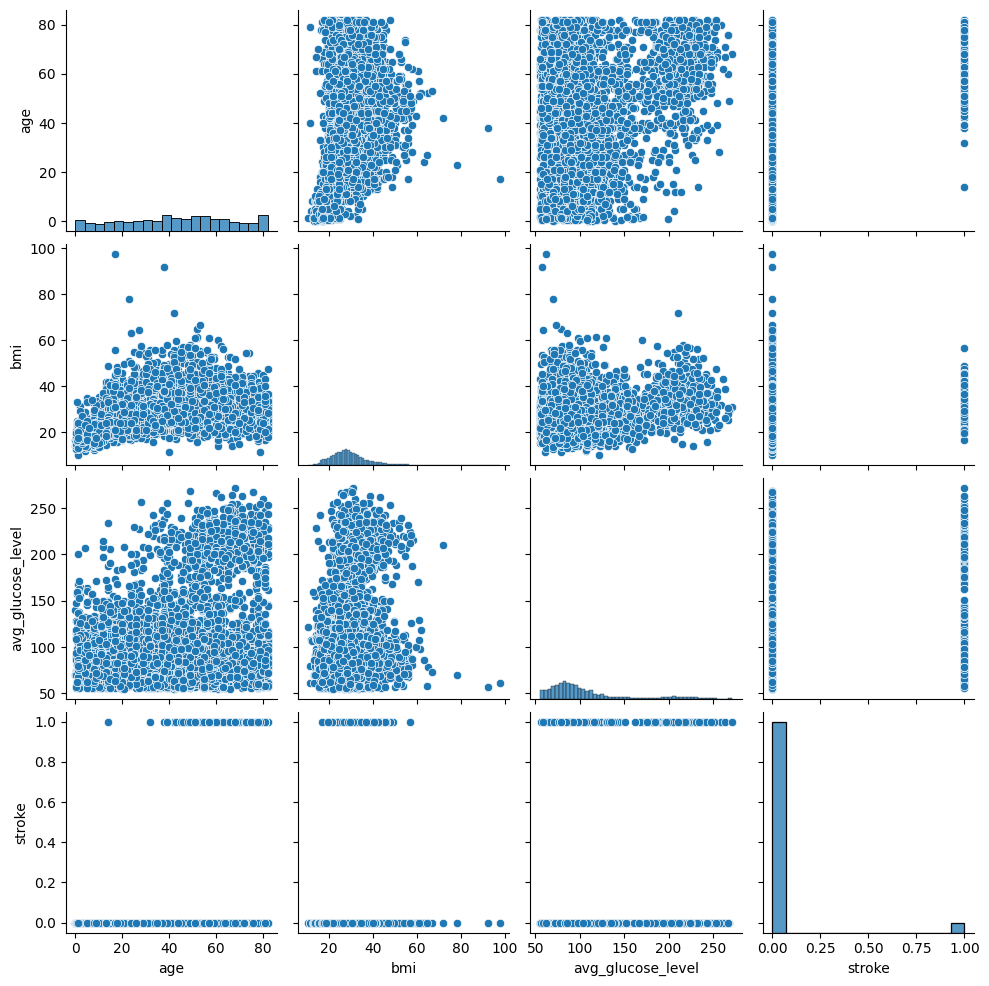

In [33]:
# comparação de variáveis numéricas com stroke
df_selecionado = df[['age', 'bmi','avg_glucose_level','stroke']]
sns.pairplot(df_selecionado)

In [34]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [35]:
colunasString = df.select_dtypes(include='object').columns.values
colunasString

array(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'], dtype=object)

In [36]:
dft= pd.concat([df.drop(colunasString, axis=1),
                      pd.get_dummies(df[colunasString], prefix=colunasString)], axis=1)

dft.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Female', 'gender_Male', 'gender_Other',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [37]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4909 non-null   float64
 1   hypertension                    4909 non-null   int64  
 2   heart_disease                   4909 non-null   int64  
 3   avg_glucose_level               4909 non-null   float64
 4   bmi                             4909 non-null   float64
 5   stroke                          4909 non-null   int64  
 6   gender_Female                   4909 non-null   bool   
 7   gender_Male                     4909 non-null   bool   
 8   gender_Other                    4909 non-null   bool   
 9   ever_married_No                 4909 non-null   bool   
 10  ever_married_Yes                4909 non-null   bool   
 11  work_type_Govt_job              4909 non-null   bool   
 12  work_type_Never_worked          4909 no

In [38]:
dft = dft.sort_index(axis=1)

<AxesSubplot: >

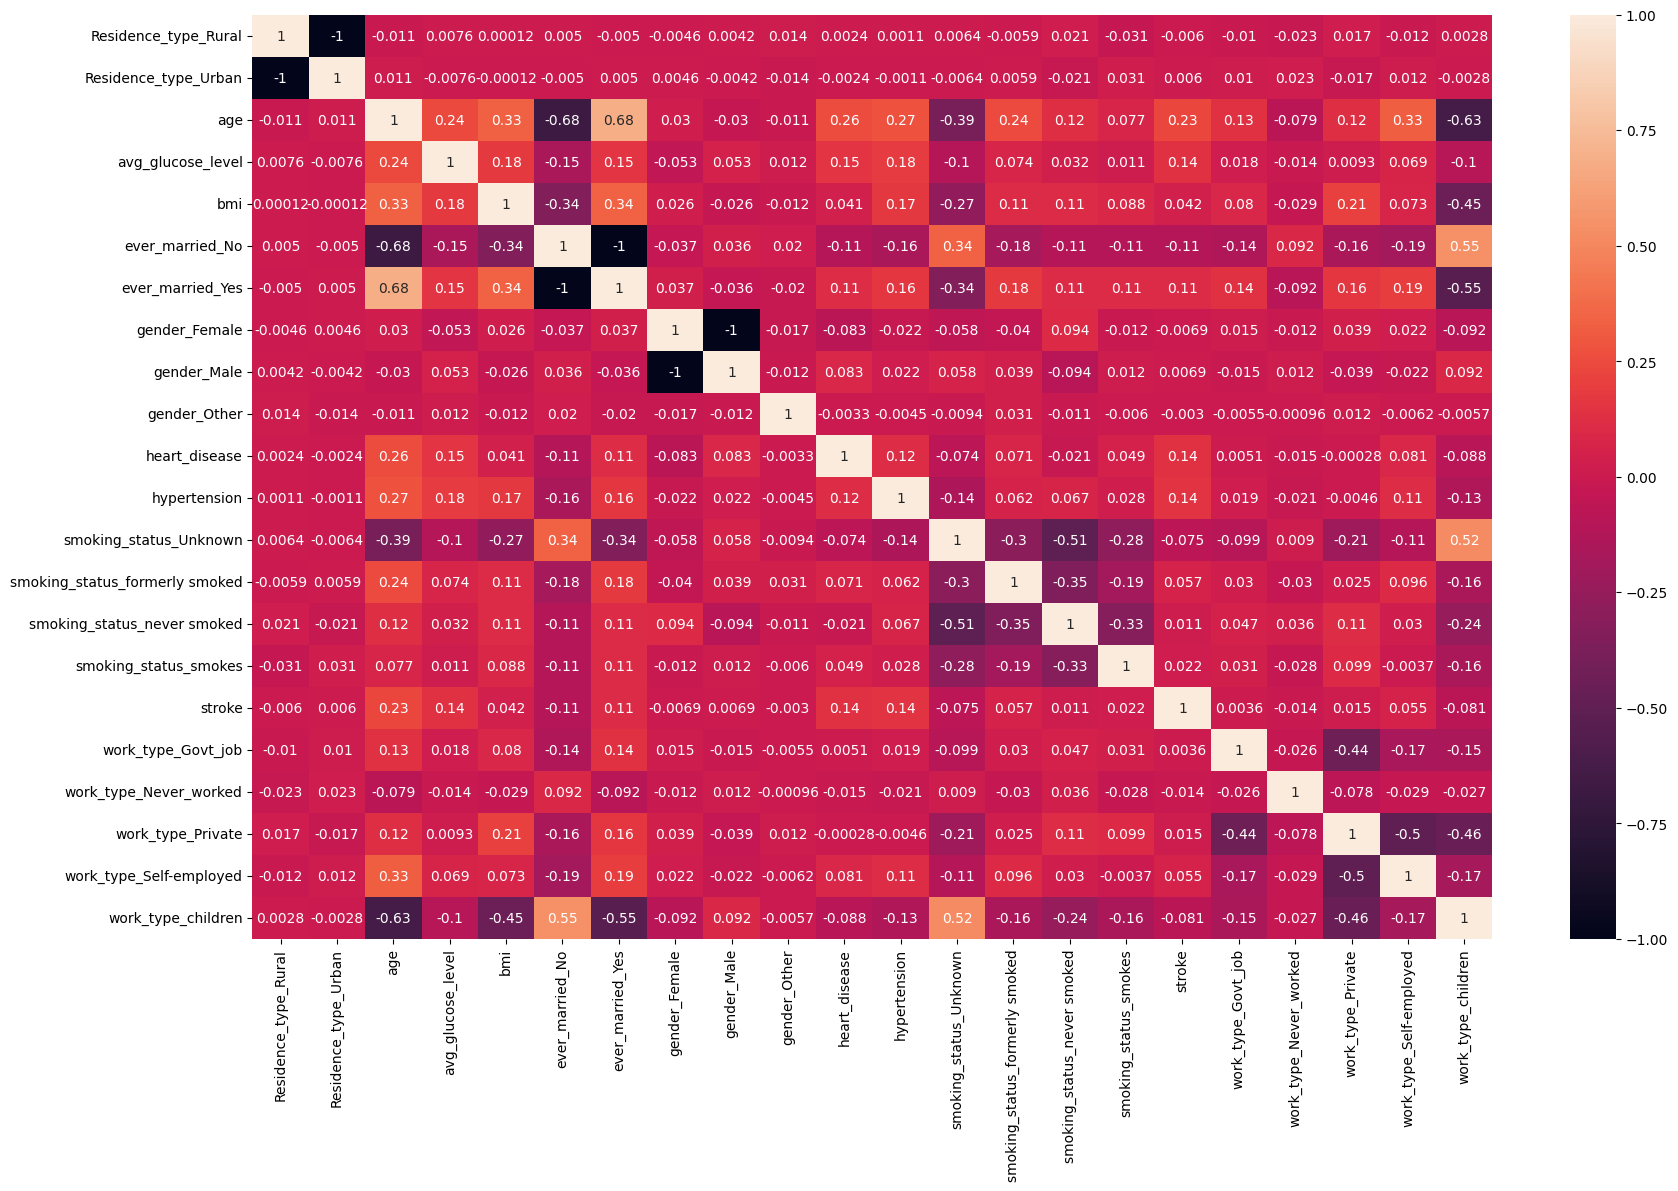

In [39]:
plt.figure(figsize=(20,12)) 
sns.heatmap(dft.corr(), cbar='flare', annot=True)

In [46]:
# Calcular a correlação entre as variáveis e o target
correlacao = dft.corr()['stroke'].abs()

# Calcular a porcentagem de influência de cada variável
porcentagem_influencia = correlacao / correlacao.sum() * 100

# Exibir as porcentagens de influência
for nome_variavel, porcentagem in sorted(zip(porcentagem_influencia.index, porcentagem_influencia), key=lambda x: x[1], reverse=True):
    print(f'{nome_variavel}: {porcentagem:.2f}%')

# com essa análise é possível selecionar as variáveis de maiores influência: age, hypertension, avg_glucose_level, heart_disease

stroke: 44.12%
age: 10.25%
hypertension: 6.29%
avg_glucose_level: 6.13%
heart_disease: 6.09%
ever_married_Yes: 4.64%
ever_married_No: 4.64%
work_type_children: 3.57%
smoking_status_Unknown: 3.31%
smoking_status_formerly smoked: 2.53%
work_type_Self-employed: 2.44%
bmi: 1.87%
smoking_status_smokes: 0.95%
work_type_Private: 0.66%
work_type_Never_worked: 0.62%
smoking_status_never smoked: 0.47%
gender_Male: 0.31%
gender_Female: 0.30%
Residence_type_Rural: 0.27%
Residence_type_Urban: 0.27%
work_type_Govt_job: 0.16%
gender_Other: 0.13%


In [51]:
colunas_selecionadas = ['age', 'hypertension', 'avg_glucose_level', 'heart_disease', 'stroke']

Separar dados em dados de treino e de teste

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_error, mean_squared_error, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

from imblearn.over_sampling import SMOTE

In [52]:
dfts = dft[colunas_selecionadas]

In [53]:
X = dfts.drop('stroke', axis=1)
y = dfts['stroke']

In [57]:
smt = SMOTE(random_state=123)  
X, y = smt.fit_resample(X, y)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=123)

Estudo do df de treinamento

In [59]:
modelo = LogisticRegression()

In [60]:
modelo.fit(X_train, y_train.ravel())

LogisticRegression()

In [63]:
y_predicao = modelo.predict(X_test)

In [65]:
import numpy as np

In [72]:
# Calcular acurácia
acuracia = accuracy_score(y_test, y_predicao)

# Calcular precisão
precisao = precision_score(y_test, y_predicao)

# Calcular sensibilidade (recall)
sensibilidade = recall_score(y_test, y_predicao)

# Calcular especificidade
matriz_confusao = confusion_matrix(y_test, y_predicao)
especificidade = matriz_confusao[0, 0] / (matriz_confusao[0, 0] + matriz_confusao[0, 1])

# Imprimir os resultados
print('Acurácia:', acuracia)
print('Precisão:', precisao)
print('Sensibilidade:', sensibilidade)
print('Especificidade:', especificidade)

Acurácia: 0.7705673758865248
Precisão: 0.7558221594918842
Sensibilidade: 0.7806122448979592
Especificidade: 0.761049723756906


Área da curva ROC:  0.7708309843274327


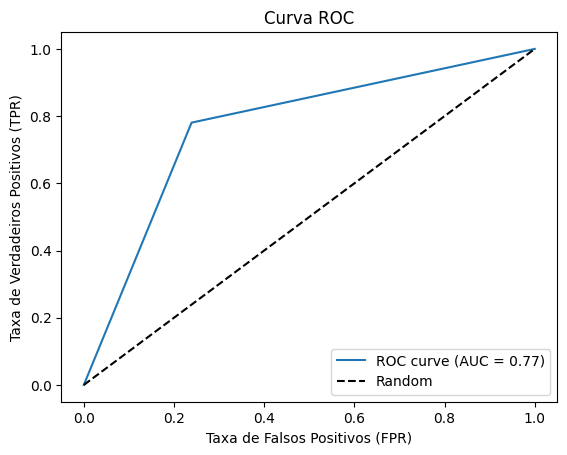

In [79]:
# Calcular a taxa de falsos positivos (FPR), a taxa de verdadeiros positivos (TPR) e os limiares
fpr, tpr, thresholds = roc_curve(y_test, y_predicao)

# Calcular a área sob a curva ROC
auc = roc_auc_score(y_test, y_predicao)
print('Área da curva ROC: ', auc)

# Plotar o gráfico ROC
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

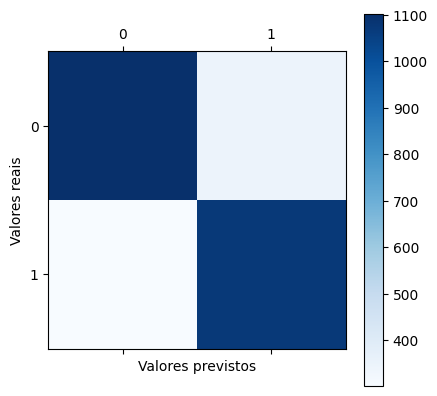

In [69]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_predicao)

# Traçar a matriz de confusão
plt.matshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Valores previstos')
plt.ylabel('Valores reais')
plt.show()

In [70]:
frequencias = cm / np.sum(cm)

# Criar um DataFrame a partir da matriz de confusão com as porcentagens
df_cm = pd.DataFrame(frequencias, index=['True 0', 'True 1'], columns=['Pred 0', 'Pred 1'])

# Imprimir a matriz de confusão com as porcentagens
print(df_cm)

          Pred 0    Pred 1
True 0  0.390780  0.122695
True 1  0.106738  0.379787
